Implement the following task in Python.
1. Download the Iris dataset from UCI Machine Learning repository, https://
archive.ics.uci.edu/ml/datasets/iris. The data set contains 3 classes
of 50 instances each, where each class refers to a type of iris plant.


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_df = pd.read_csv(url, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

print(iris_df.head())
print(iris_df.metadata)

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


AttributeError: 'DataFrame' object has no attribute 'metadata'

2. Visualize the data set in the 2D space of the first two features (sepal length
and sepal width). Points from different classes should be visualized with
different colors.


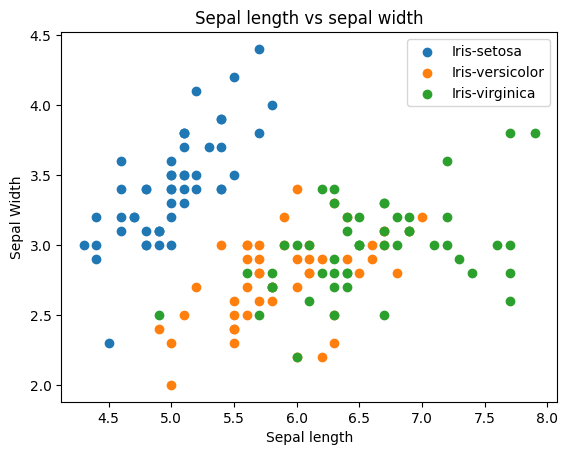

In [ ]:
class_names = iris_df['class'].unique()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
classes = {cls: colors[i % len(colors)] for i, cls in enumerate(class_names)}

plt.figure()
for cls, color in classes.items():
    subset = iris_df[iris_df["class"] == cls]
    plt.scatter(subset["sepal_length"], subset["sepal_width"], label=cls, color=color)
    #plt giver automatisk farve, så vi behøver kun at angive labels...

plt.xlabel("Sepal length")
plt.ylabel("Sepal Width")
plt.title("Sepal length vs Sepal width")
plt.legend()
plt.show()

3. Calculate the average sepal length for each of the three classes

In [33]:
for c in class_names:
    subset = iris_df[iris_df['class'] == c]
    average = subset['sepal_length'].mean()
    print(average)


5.006
5.936
6.587999999999998


4. Calculate the variance of sepal length for each of the three classes. (It
is advised to implement the variance calculation yourself rather than use
built-in functions: this will give you some hands-on experience with the
concept.)

In [47]:
mean_per_class = iris_df.groupby('class')['sepal_length'].transform('mean')

iris_df['variance'] = (iris_df['sepal_length'] - mean_per_class) ** 2
variance_per_class = iris_df.groupby('class')['variance'].sum()
#iris_df['var_pr_class'] = variance_per_class
print(variance_per_class)
print(iris_df.head())

class
Iris-setosa         6.0882
Iris-versicolor    13.0552
Iris-virginica     19.8128
Name: variance, dtype: float64
   sepal_length  sepal_width  petal_length  petal_width        class  variance
0           5.1          3.5           1.4          0.2  Iris-setosa  0.008836
1           4.9          3.0           1.4          0.2  Iris-setosa  0.011236
2           4.7          3.2           1.3          0.2  Iris-setosa  0.093636
3           4.6          3.1           1.5          0.2  Iris-setosa  0.164836
4           5.0          3.6           1.4          0.2  Iris-setosa  0.000036


In [43]:
variance_per_class = iris_df.groupby('class')['sepal_length'].var()
print(variance_per_class)

class
Iris-setosa        0.124249
Iris-versicolor    0.266433
Iris-virginica     0.404343
Name: sepal_length, dtype: float64


#Andre detaljer lært gennem codeacademy:

In [53]:
iris_df['class'].value_counts(normalize=True, ascending=True)

class
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

value_counts bruges til at tælle unikke forekomster i en kolonne. Hvilket er anvendeligt i kategoriske data.

Til numeriske data kan man bruge describe() metoden til at få en hurtig oversigt over centrale tendenser, herunder gennemsnit, median og kvartiler.
Man kan også finde enkelte statistiske mål som ses i describe() ved at bruge metoder som mean(), median(), std(), var(), min(), max(), quantil()

In [54]:
iris_df['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [57]:
print(iris_df['sepal_length'].std())

0.828066127977863


In [58]:
iris_df.index

RangeIndex(start=0, stop=150, step=1)

In [63]:
iris_df['sepal_length'].value_counts().index

Index([5.0, 6.3, 5.1, 6.7, 5.7, 6.4, 5.5, 5.8, 4.9, 6.0, 5.4, 5.6, 6.1, 6.5,
       4.8, 7.7, 6.9, 4.6, 5.2, 6.2, 4.4, 7.2, 5.9, 6.8, 4.7, 6.6, 4.3, 7.0,
       5.3, 4.5, 7.1, 7.3, 7.6, 7.4, 7.9],
      dtype='float64', name='sepal_length')

In [64]:
iris_df['sepal_length'].value_counts().reset_index()

,sepal_length,count
0,5.0,10
1,6.3,9
2,5.1,9
3,6.7,8
4,5.7,8
5,6.4,7
6,5.5,7
7,5.8,7
8,4.9,6
9,6.0,6


In [68]:
iris_df.sort_values(by='sepal_length', ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,class
131,7.9,3.8,6.4,2.0,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
...,...,...,...,...,...
41,4.5,2.3,1.3,0.3,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa


In [70]:
iris_df.sort_index()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


.loc selecterer data baseret på labels (række- og kolonnenavne).
.iloc selecterer data baseret på den numeriske position (række- og kolonneindeks).

In [77]:
# .loc[list_of_row_labels, list_of_column_labels]

iris_df.loc[[2, 3, 4], ['class']]

,class
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [79]:
# .iloc[list_of_row_positions, list_of_column_positions]
iris_df.iloc[:4, -1]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
Name: class, dtype: object

In [83]:
#Broadcasting a mask
setosa = iris_df['class'] == 'Iris-setosa'
setosa

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: class, Length: 150, dtype: bool

In [84]:
# now select values based on this mask:
iris_df[setosa]

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# Practise
module_iris = (iris_df['sepal_length'] % 2 == 0) & ((iris_df['petal_width'] == 1.6) | (iris_df['petal_width'] >= 1.4)) # combine comparisons with: (..) & ((..) | (..))
iris_df[module_iris]


,sepal_length,sepal_width,petal_length,petal_width,class
78,6.0,2.9,4.5,1.5,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor
85,6.0,3.4,4.5,1.6,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica


In [95]:
# invert:
iris_df[ ~module_iris]

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
